# HELPER: Import Simulated and Lab Data (vzd1)

#### Din-Ammar Tolj - Y25
Maruyama Group, Summer 2023

This helper notebook imports simulated data using ROOT and lab data using the dt5202 script. The data is appended to arrays. It is not meant to be run on its own, but rather in other notebooks.

#### TEMPORARY, this should be converted to a Python script eventually

### Import simulated .ROOT files

In [2]:
folder_g = "../gamma_sim/gamma_sim-build/" # location of the gamma sim build folder
folder_m = "../muons_edited/muonsInPanel_build/" # location of the muon sim build folder
 
# Open ROOT files
f1460 = TFile.Open(folder_g + "K40-1460KeV-25x.root","READ")
f2614 = TFile.Open(folder_g + "Tl208-2614KeV-25x.root","READ")

# Bismuth peaks
f1120 = TFile.Open(folder_g + "Bi214-1120KeV-25x.root", "READ")
f1238 = TFile.Open(folder_g + "Bi214-1238KeV-25x.root", "READ")
f1764 = TFile.Open(folder_g + "Bi214-1764KeV-25x.root", "READ")
f2204 = TFile.Open(folder_g + "Bi214-2204KeV-25x.root", "READ")

# Lower peaks
f968 = TFile.Open(folder_g + "Ac228-968KeV-25x.root", "READ")
f934 = TFile.Open(folder_g + "Bi214-934KeV-25x.root", "READ")
f911 = TFile.Open(folder_g + "Ac228-911KeV-25x.root", "READ")
f609 = TFile.Open(folder_g + "Bi214-609KeV-25x.root", "READ")
f583 = TFile.Open(folder_g + "Tl208-583KeV-25x.root", "READ")

# Muons
muons = TFile(folder_m + "muonsJ_normalized.root", "READ")

## 

# Read the TTree for main two gamma isotopes
tree1460 = f1460.Get("Hits")
tree2614 = f2614.Get("Hits")

# Read the TTree for the nearby Bismuth-214 isotopes
tree1120 = f1120.Get("Hits")
tree1238 = f1238.Get("Hits")
tree1764 = f1764.Get("Hits")
tree2204 = f2204.Get("Hits")

# Read the TTree for the remaining low-freq. isotopes
tree968 = f968.Get("Hits")
tree934 = f934.Get("Hits")
tree911 = f911.Get("Hits")
tree609 = f609.Get("Hits")
tree583 = f583.Get("Hits")

# For the TTree for Muons
a = muons.Get("ntuple")
muonstree = a.Get("parTup")

In [3]:
# Append the energy values from the TTree into an array
energyDeposited1460 = []
entries= tree1460.GetEntries();
for i in range(0,entries):
    tree1460.GetEntry(i)
    energyDeposited1460.append(tree1460.EnergyDeposited)

energyDeposited2614 = []
entries= tree2614.GetEntries();
for i in range(0,entries):
    tree2614.GetEntry(i)
    energyDeposited2614.append(tree2614.EnergyDeposited)

energyDeposited1120 = []
entries= tree1120.GetEntries();
for i in range(0,entries):
    tree1120.GetEntry(i)
    energyDeposited1120.append(tree1120.EnergyDeposited)

energyDeposited1238 = []
entries= tree1238.GetEntries();
for i in range(0,entries):
    tree1238.GetEntry(i)
    energyDeposited1238.append(tree1238.EnergyDeposited)

energyDeposited1764 = []
entries= tree1764.GetEntries();
for i in range(0,entries):
    tree1764.GetEntry(i)
    energyDeposited1764.append(tree1764.EnergyDeposited)

energyDeposited2204 = []
entries= tree2204.GetEntries();
for i in range(0,entries):
    tree2204.GetEntry(i)
    energyDeposited2204.append(tree2204.EnergyDeposited)
    
# And the remaining peaks
energyDeposited968 = []
entries= tree968.GetEntries();
for i in range(0,entries):
    tree968.GetEntry(i)
    energyDeposited968.append(tree968.EnergyDeposited)

energyDeposited934 = []
entries= tree934.GetEntries();
for i in range(0,entries):
    tree934.GetEntry(i)
    energyDeposited934.append(tree934.EnergyDeposited)

energyDeposited911 = []
entries= tree911.GetEntries();
for i in range(0,entries):
    tree911.GetEntry(i)
    energyDeposited911.append(tree911.EnergyDeposited)

energyDeposited609 = []
entries= tree609.GetEntries();
for i in range(0,entries):
    tree609.GetEntry(i)
    energyDeposited609.append(tree609.EnergyDeposited)

energyDeposited583 = []
entries= tree583.GetEntries();
for i in range(0,entries):
    tree583.GetEntry(i)
    energyDeposited583.append(tree583.EnergyDeposited)
    
# Append muons
muonsEnergy = []
for event in muonstree:
    muonsEnergy.append(event.Edeposited)

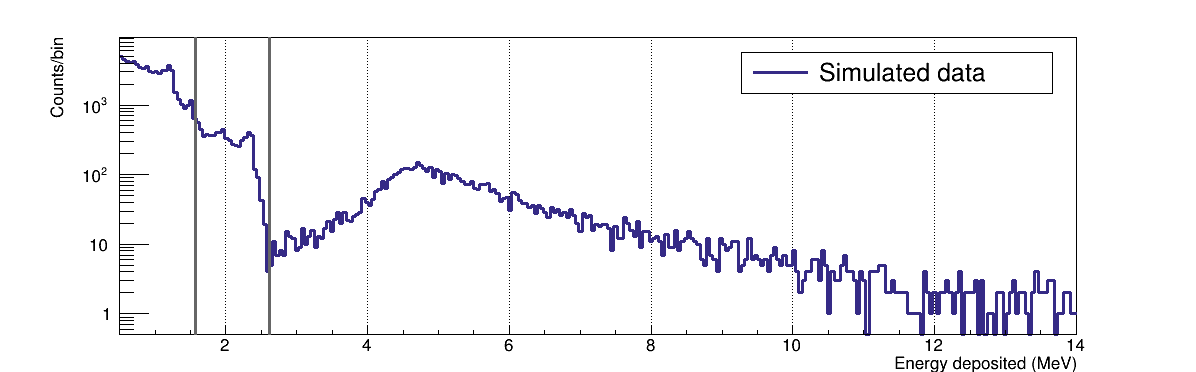

In [4]:
c1 = TCanvas('c1','',1200,400)
# c1.SetLogy()
sim_root = TH1D('sim_root','',300,0.5,14)
fill_hist(sim_root, np.concatenate((energyDeposited1460,energyDeposited2614,energyDeposited1120,energyDeposited1238,energyDeposited1764,energyDeposited2204,energyDeposited968,energyDeposited934,energyDeposited911,energyDeposited609,energyDeposited583,muonsEnergy)))
gStyle.SetPalette(kBird)

sim_root.Draw("plc pmc")
sim_root.GetXaxis().SetTitle("Energy deposited (MeV)")
sim_root.GetXaxis().SetLabelSize(.05)
sim_root.GetXaxis().SetTitleSize(.05)
sim_root.GetYaxis().SetTitle("Counts/bin")
sim_root.GetYaxis().SetLabelSize(.05)
sim_root.GetYaxis().SetTitleSize(.05)
sim_root.GetYaxis().SetTitleOffset(.65)
# sim_root.GetYaxis().SetRangeUser(0,10**4)
sim_root.SetLineWidth(3)

gPad.SetLogy()
gPad.SetGridx()
gStyle.SetOptStat(0)

legend = TLegend(0.62,0.75,0.88,0.86)
legend.AddEntry(sim_root,"Simulated data","l")
legend.Draw()

line1 = TLine(1.57,0,1.57,9.4*10**3)
line1.SetLineColor(ROOT.kGray+2)
line1.SetLineWidth(3)
line1.Draw()

line2 = TLine(2.614,0,2.614,9.4*10**3)
line2.SetLineColor(ROOT.kGray+2)
line2.SetLineWidth(3)
line2.Draw()

c1.Draw()

### Load and read lab data from directory

In [5]:
%%capture

sourceFolder = "/data/board1771_01192023_retestingSwirlyPanel/"

onlyfiles = [f for f in os.listdir(sourceFolder) if '.dat' in f]

data_list = []
for file in onlyfiles:
    data_list.append(dt5202_crunch(str(sourceFolder)+str(file), num_ev=100000000, num_ch=1))

data = data_list[0]
for i in range(1, len(data_list)):
    data = np.append(data, data_list[i])

In [6]:
# Convert lab data to MeV

d = data['data']['low_gain']-ped
lab_mev = (d.astype('float64'))/adc_mev # lab data in MeV

NameError: name 'ped' is not defined